# Importing all necessary Libraries

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Importing dataset and creating a dataframe

In [99]:
data = pd.read_csv("Loan_Data.csv")
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [100]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Handling of Null Values

In [102]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [103]:
# as a large amount of rows are being dropped if we remove null values
data.dropna()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [104]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [105]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [106]:
# so we are not removing null values and instead we are replacing null values with some values
data.fillna({'Gender': 'Unknown', 'Married': '0', 'Dependents': '0', 
             'Self_Employed': 'Unknown', 'LoanAmount': data['LoanAmount'].mean(), 
             'Loan_Amount_Term': data['Loan_Amount_Term'].mode()[0], 
             'Credit_History': 1}, inplace=True)

In [107]:
# Finally all null values are removed
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [108]:
#checking any random value
data.iloc[32,:]

Loan_ID              LP001097
Gender                   Male
Married                    No
Dependents                  1
Education            Graduate
Self_Employed             Yes
ApplicantIncome          4692
CoapplicantIncome         0.0
LoanAmount              106.0
Loan_Amount_Term        360.0
Credit_History            1.0
Property_Area           Rural
Loan_Status                 N
Name: 32, dtype: object

In [109]:
# Info about the cleaned dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Finding and Removing outliers

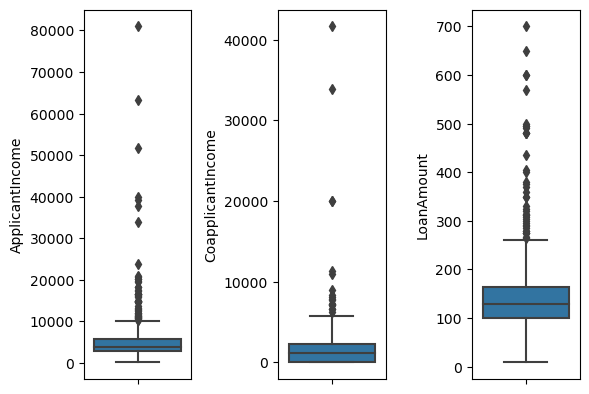

In [111]:
plt.subplot(1,3,1)
sns.boxplot(data,y='ApplicantIncome')
plt.subplot(1,3,2)
sns.boxplot(data,y='CoapplicantIncome')
plt.subplot(1,3,3)
sns.boxplot(data,y='LoanAmount')
plt.subplots_adjust(wspace=0.8)

In [112]:
# removing outliers using quantile method
arr=["ApplicantIncome","CoapplicantIncome","LoanAmount"]
for a in arr:
    q1 = data[a].quantile(.25)
    q3 = data[a].quantile(.75)

    iqr = q3-q1

    lowerExtreme = q1-1.5*iqr
    upperExtreme = q3+1.5*iqr

    lowerExtreme, upperExtreme

    data = data[(data[a] <upperExtreme) & (data[a] >lowerExtreme)]


In [113]:
data.shape

(520, 13)

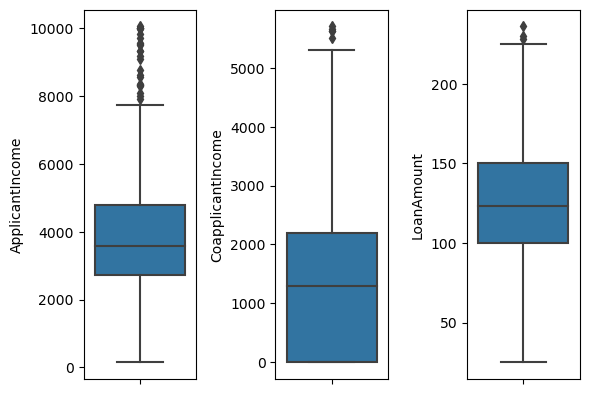

In [114]:
# After removing the outliers
plt.subplot(1,3,1)
sns.boxplot(data,y='ApplicantIncome')
plt.subplot(1,3,2)
sns.boxplot(data,y='CoapplicantIncome')
plt.subplot(1,3,3)
sns.boxplot(data,y='LoanAmount')
plt.subplots_adjust(wspace=0.7)

In [115]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


# Insights and Data Visualisation

<Axes: >

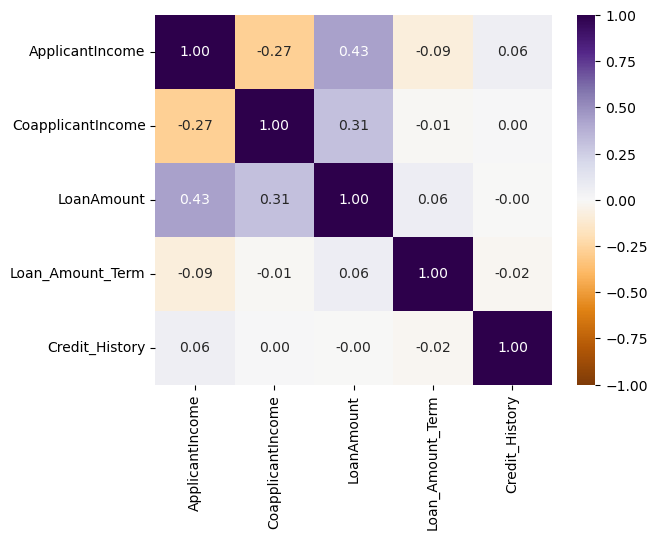

In [117]:
corr = data.corr()
sns.heatmap(corr, annot=True, fmt=".2f", vmin=-1, vmax=1, cmap="PuOr")

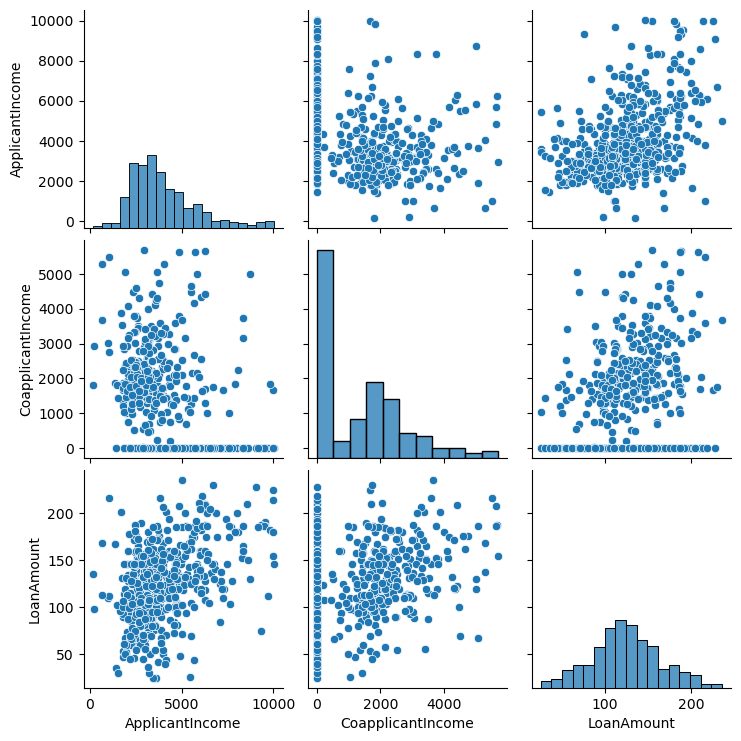

In [118]:
sns.pairplot(data[["ApplicantIncome","CoapplicantIncome","LoanAmount"]])

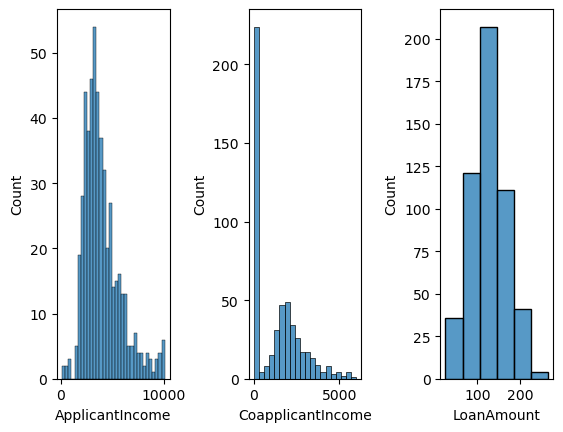

In [157]:
arr=["ApplicantIncome","CoapplicantIncome","LoanAmount"]
for i in range(2):
    plt.subplot(1,3,i+1)
    sns.histplot(data[arr[i]],binwidth=300)
plt.subplot(1,3,3)    
sns.histplot(data[arr[2]],binwidth=40)    
plt.subplots_adjust(wspace=0.7) 
plt.show()

# Data Splitting and Model Training

In [121]:
encoder = LabelEncoder()
data['Gender'] = encoder.fit_transform(data['Gender'])
data['Married'] = encoder.fit_transform(data['Married'])
data['Dependents'] = encoder.fit_transform(data['Dependents'])
data['Education'] = encoder.fit_transform(data['Education'])
data['Self_Employed'] = encoder.fit_transform(data['Self_Employed'])
data['Property_Area'] = encoder.fit_transform(data['Property_Area'])
data['Loan_Status'] = encoder.fit_transform(data['Loan_Status'])

In [122]:
X = data.drop(columns=['Loan_ID', 'Loan_Status'])
y = data['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sc=StandardScaler()

X_train=sc.fit_transform(X_train)

X_test=sc.transform(X_test)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [123]:
y_pred = model.predict(X_test)


# Model Evaluation

In [125]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("Accuracy:", accuracy_score(y_test, y_pred)*100,"%")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion matrix:\n",confusion_matrix(y_test,y_pred))




Accuracy: 79.8076923076923 %
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.53      0.63        34
           1       0.80      0.93      0.86        70

    accuracy                           0.80       104
   macro avg       0.79      0.73      0.75       104
weighted avg       0.80      0.80      0.79       104

Confusion matrix:
 [[18 16]
 [ 5 65]]


# Test Cases

In [127]:

# TEST CASE 1 
new_data = {
    'Gender': 'Male',
    'Married': 'Yes',
    'Dependents': '1',
    'Education': 'Graduate',
    'Self_Employed': 'No',
    'ApplicantIncome': 5000,
    'CoapplicantIncome': 2000,
    'LoanAmount': 150,
    'Loan_Amount_Term': 360,
    'Credit_History': 1,
    'Property_Area': 'Urban'
}

# Convert to DataFrame
new_data_df = pd.DataFrame([new_data])

# Apply the same LabelEncoder used during training
# Encode categorical features
new_data_df['Gender'] = encoder.fit_transform(new_data_df['Gender'])
new_data_df['Married'] = encoder.fit_transform(new_data_df['Married'])
new_data_df['Dependents'] = encoder.fit_transform(new_data_df['Dependents'])
new_data_df['Education'] = encoder.fit_transform(new_data_df['Education'])
new_data_df['Self_Employed'] = encoder.fit_transform(new_data_df['Self_Employed'])
new_data_df['Property_Area'] = encoder.fit_transform(new_data_df['Property_Area'])

# Standardize numerical features
new_data_scaled = sc.fit_transform(new_data_df)

# Predict loan status
loan_status_prediction = model.predict(new_data_scaled)
print("Predicted Loan Status:", "Approved" if loan_status_prediction[0] == 1 else "Rejected")


Predicted Loan Status: Approved


In [128]:

# TEST CASE 2 
new_data = {
    'Gender': 'Male',
    'Married': 'Yes',
    'Dependents': '1',
    'Education': 'Not Graduate',
    'Self_Employed': 'No',
    'ApplicantIncome': 1500,
    'CoapplicantIncome': 3000,
    'LoanAmount': 150000,
    'Loan_Amount_Term': 365,
    'Credit_History': 0
    ,
    'Property_Area': 'Urban'
}

# Convert to DataFrame
new_data_df = pd.DataFrame([new_data])

# Apply the same LabelEncoder used during training
# Encode categorical features
new_data_df['Gender'] = encoder.fit_transform(new_data_df['Gender'])
new_data_df['Married'] = encoder.fit_transform(new_data_df['Married'])
new_data_df['Dependents'] = encoder.fit_transform(new_data_df['Dependents'])
new_data_df['Education'] = encoder.fit_transform(new_data_df['Education'])
new_data_df['Self_Employed'] = encoder.fit_transform(new_data_df['Self_Employed'])
new_data_df['Property_Area'] = encoder.fit_transform(new_data_df['Property_Area'])

# Standardize numerical features
new_data_scaled = sc.fit_transform(new_data_df)

# Predict loan status
loan_status_prediction = model.predict(new_data_scaled)
print("Predicted Loan Status:", "Approved" if loan_status_prediction[0] == 1 else "Rejected")


Predicted Loan Status: Approved
